<a href="https://colab.research.google.com/github/RafaSFernandes/DS_Projects/blob/main/Estudo_de_regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escola DNC

Aluno: Rafael Souza Fernandes

Material de estudo

#0. Bibliotecas

In [43]:
#Dados
import pandas as pd

#Matemática
import numpy as np
# from random import randint

#Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing
from sklearn.preprocessing import OneHotEncoder

#sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #Separação de treino e teste
# from sklearn.model_selection import KFold #Validação K-fold

from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error, mean_absolute_percentage_error

# #Métricas de avaliação
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #Métricas
# from sklearn.metrics import confusion_matrix #Matriz de confusão
# from sklearn.metrics import classification_report #Relatório com métricas de avaliação

Funções

In [2]:
def residual_plot(y_pred, residuals):
  plt.scatter(x=y_pred, y=residuals) #plot dos pontos residuais
  plt.axhline(0, color="red", linestyle="--") #plot de linha horizontal (zero)

  #rótulos
  plt.xlabel("Predicted values")
  plt.ylabel("Residuals")

  plt.title("Residual plot") #titulo

  plt.show() #exibe o plot gráfico

In [104]:
#report de regressão
def regression_report(y_true, y_pred): #definindo a função

  MAE = mean_absolute_error(y_true, y_pred)
  MSE = mean_squared_error(y_true, y_pred)
  RMSE = root_mean_squared_error(y_true, y_pred)
  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  R2 = r2_score(y_true, y_pred)

  #criando o report no formato tipo Series
  report = pd.Series({
      "MAE" : MAE,
      "MSE" : MSE,
      "RMSE": RMSE,
      "MAPE": MAPE,
      "R2"  : R2
  })

  return report

#1. Importando dados

In [3]:
#montagem do drive para importar base de dados
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#nome do arquivo e caminho
path = "/content/drive/MyDrive/Datasets_Modulos/Modulo_5/Datasets - DataCW/"
filename = "gym_members_exercise_tracking.csv"

#2. Explorando os dados

In [5]:
#leitura do arquivo
df = pd.read_csv(path + filename)

In [6]:
#explorando as primeiras linhas
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [7]:
#dimensões do df (973 linhas e 15 colunas)
df.shape

(973, 15)

Pensando que quanto mais exercícios realizamos, mais calorias queimamos, partimos da hipótese de que exista uma relação linear entre a duração do exercícios e a quantidade de calorias queimadas.

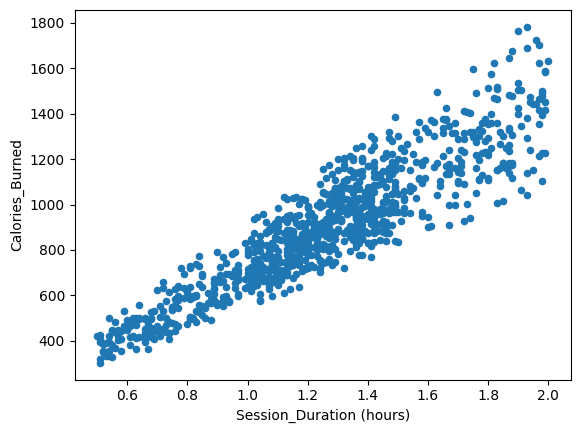

In [8]:
#verificando graficamente uma possível linearidade
df.plot(x="Session_Duration (hours)", y="Calories_Burned", kind="scatter");

O grafico apresenta um padrão crescente, indicando a linearidade neste sentido: quanto maior a duração do exercícios, maior é a queima de calorias.

#3. One hot encoding

In [9]:
#exibindo os nomes das colunas
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [10]:
#separando variáveis numéricas e categóricas
df_numeric = df.drop(columns=['Gender', 'Workout_Type'])
df_categoric = df[['Gender', 'Workout_Type']]

In [11]:
#criando e treinando o encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
encoder.fit(df_categoric)

OneHotEncoder(sparse_output=False)

In [12]:
#transformação
df_encode_categoric = encoder.transform(df_categoric)

In [13]:
#verificando o resultado da transformação
df_encode_categoric

,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
968,0.0,1.0,0.0,0.0,1.0,0.0
969,0.0,1.0,0.0,0.0,1.0,0.0
970,1.0,0.0,1.0,0.0,0.0,0.0
971,0.0,1.0,0.0,1.0,0.0,0.0


In [14]:
#substituindo as variáveis categóricas
df = pd.concat([df.drop(columns=df_categoric.columns), df_encode_categoric], axis=1)

In [15]:
#verificando o resultado
df

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,0.0,1.0,0.0,0.0,0.0,1.0
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,1.0,0.0,0.0,1.0,0.0,0.0
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,1.0,0.0,1.0,0.0,0.0,0.0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,0.0,1.0,0.0,0.0,1.0,0.0
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77,0.0,1.0,0.0,0.0,1.0,0.0
969,25,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69,0.0,1.0,0.0,0.0,1.0,0.0
970,59,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50,1.0,0.0,1.0,0.0,0.0,0.0
971,32,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74,0.0,1.0,0.0,1.0,0.0,0.0


#4. Separação das variáveis

In [16]:
#separando os nomes das colunas que serão variáveis
features = df.drop(columns="Calories_Burned").columns
target = df["Calories_Burned"].name

In [17]:
#separação X e y
X1 = df[["Session_Duration (hours)"]]
X = df[features]
y = df[target]

#5. Modelo de Regressão Linear

##5.1. FIT 1

In [18]:
#criação e treinamento do modelo
model = LinearRegression()
fit1 = model.fit(X1, y) #treino da coluna "Session_Duration (hours)"

In [19]:
#previsão da coluna "Session_Duration (hours)"
y_pred1 = fit1.predict(X1)

In [20]:
#cálculo de resíduos do fit1
residuals1 = y - y_pred1
residuals1

,Calories_Burned
0,94.628092
1,-53.875362
2,-122.736019
3,107.592709
4,95.503409
...,...
968,232.242414
969,265.381757
970,-311.025489
971,90.481841


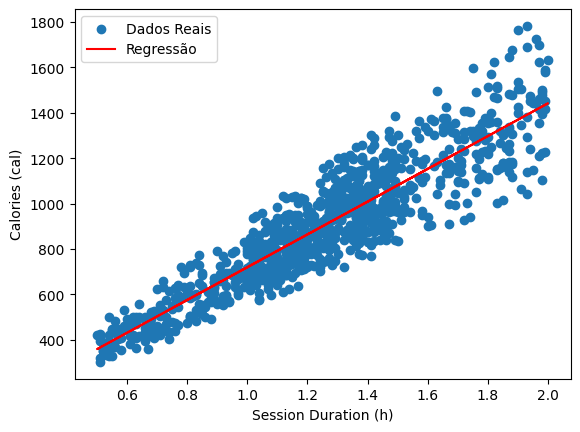

In [21]:
#plot do gráfico de dispersão coma  reta de regressão no fit1

plt.scatter(X1, y=y, label="Dados Reais") #plot dos pontos representando os valores reais
plt.plot(X1, y_pred1, label="Regressão", color="red") #plot da reta de regressão

plt.ylabel("Calories (cal)") #rótulo em y
plt.xlabel("Session Duration (h)") #rótulo em x
plt.legend() #exibe legenda

plt.show() #exibe o plot gráfico

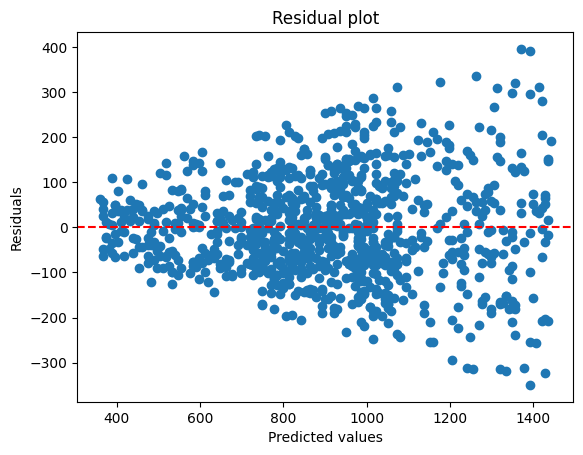

In [22]:
#plot de resíduos do fit1
residual_plot(y_pred1, residuals1)

Percebemos a maior dispersão quando o valor previsto é maior

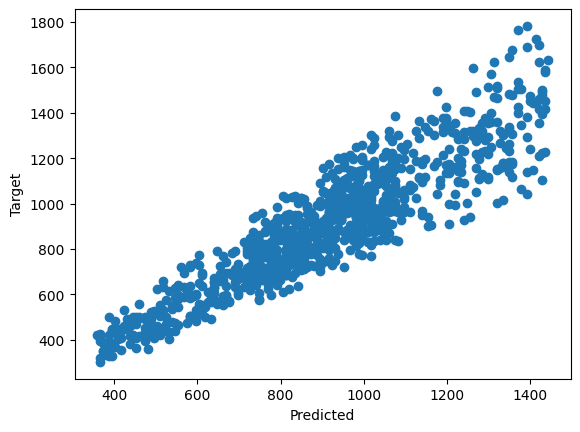

In [23]:
#plot de valor (quanto mais próximo da diagonal principal, mais próximo do valor real está a previsão)
plt.scatter(y_pred1, y) #gráfico de dispersão de valores previsto e target

#rótulos dos eixos
plt.xlabel("Predicted")
plt.ylabel("Target")

plt.show()

##5.2. FIT 2

In [24]:
#separação treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#(fit2) treino usando a coluna "Session_Duration (hours)" de X_train
fit2 = model.fit(X_train[["Session_Duration (hours)"]], y_train)

In [26]:
#(fit2) previsão da coluna "Session_Duration (hours)" de X_test
y_pred2 = fit2.predict(X_test[["Session_Duration (hours)"]])

In [27]:
#(fit2) resíduos do fit2
residuals2 = y_test - y_pred2
residuals2

,Calories_Burned
199,22.042528
538,30.415662
174,-126.840868
464,255.286697
66,151.218135
...,...
578,-80.689982
327,-78.864189
878,-63.318247
849,43.471865


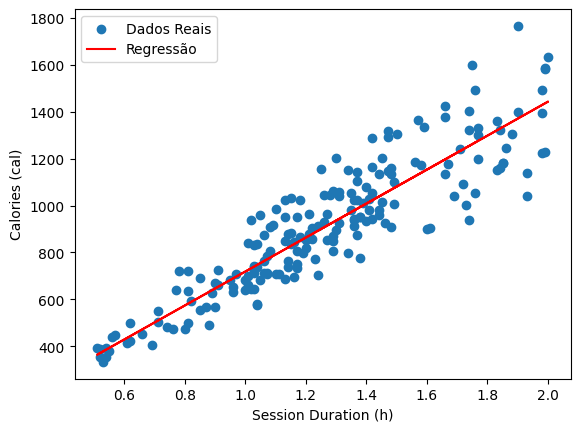

In [28]:
#plot do gráfico de dispersão e da reta de regressão

plt.scatter(X_test["Session_Duration (hours)"], y_test, label="Dados Reais") #plot de dispersão dos pontos representando os valores reais
plt.plot(X_test["Session_Duration (hours)"], y_pred2, label="Regressão", color="red") #plot da reta de regressão

#rótulos dos eixos
plt.ylabel("Calories (cal)") #rótulo em y
plt.xlabel("Session Duration (h)") #rótulo em x

plt.legend() #exibe legenda

plt.show() #exibe o plot gráfico

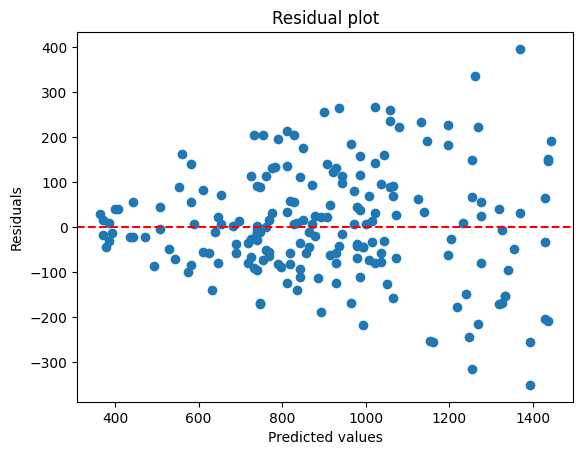

In [29]:
#plot dos resíduos do fit2
residual_plot(y_pred2, residuals2)

##5.3. FIT principal

In [30]:
#treino principal usando todas as variáveis X_train
fit = model.fit(X_train, y_train)

In [31]:
#previsão dos valores
y_pred = fit.predict(X_test)

In [32]:
#resíduos
residuals = y_test - y_pred
residuals

,Calories_Burned
199,15.707098
538,-15.980086
174,-31.023330
464,45.665579
66,82.571839
...,...
578,18.726385
327,-29.474578
878,-4.639996
849,-67.042218


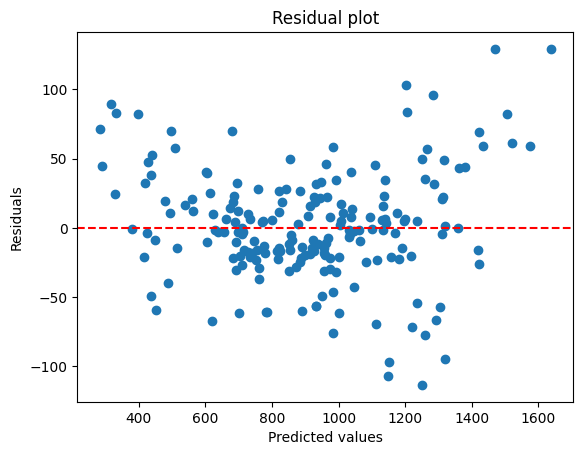

In [33]:
#plot dos resíduos
residual_plot(y_pred, residuals)

O erro encontra-se num intervalo menor, aproximando-se da linha central (zero). Percebe-se que o erro diminui observando a escala do gráfico, apresentando-se entre -120 e 120.

In [34]:
#intercepto (valor constante que não se relaciona com nenhuma variável x)
intercept = model.intercept_
intercept

np.float64(-983.677870434319)

In [35]:
#coeficientes (valores constantes que multiplicam as variáveis x)
coef = model.coef_
coef

array([-3.31556080e+00, -1.00598336e+00,  1.08168013e+02,  1.08805915e-01,
        6.15788095e+00,  6.03315684e-01,  7.12813300e+02, -6.43730698e-01,
       -3.53909166e+00,  3.95769050e+00, -3.67455298e+00,  3.36018705e+00,
       -4.12986606e+01,  4.12986606e+01,  3.95997991e+00, -2.67674260e-01,
        6.95260162e-01, -4.38756581e+00])

In [36]:
#selecionando valores de uma linha de X_test
x = X_test.iloc[0].values
x

array([ 34.  ,  71.9 ,   1.64, 170.  , 134.  ,  67.  ,   1.26,  21.3 ,
         2.1 ,   4.  ,   2.  ,  26.73,   0.  ,   1.  ,   1.  ,   0.  ,
         0.  ,   0.  ])

In [37]:
#determinando o valor da variável dependente y (esta é a interpretação da previsão para a primeira linha, também dado por y_pred)
sum(coef * x) + intercept

np.float64(913.2929019751889)

In [38]:
#previsão da primeira linha
y_pred[0]

np.float64(913.2929019751887)

In [39]:
#armazenando coeficientes em um dataframe
df_coef = pd.DataFrame({
    "Features": X_test.columns,
    "Coeficients": model.coef_
})

df_coef

,Features,Coeficients
0,Age,-3.315561
1,Weight (kg),-1.005983
2,Height (m),108.168013
3,Max_BPM,0.108806
4,Avg_BPM,6.157881
5,Resting_BPM,0.603316
6,Session_Duration (hours),712.813300
7,Fat_Percentage,-0.643731
8,Water_Intake (liters),-3.539092
9,Workout_Frequency (days/week),3.957690


In [40]:
#coluna armazenando os coeficientes absolutos
df_coef["Coeficients_Abs"] = df_coef["Coeficients"].abs()
df_coef

,Features,Coeficients,Coeficients_Abs
0,Age,-3.315561,3.315561
1,Weight (kg),-1.005983,1.005983
2,Height (m),108.168013,108.168013
3,Max_BPM,0.108806,0.108806
4,Avg_BPM,6.157881,6.157881
5,Resting_BPM,0.603316,0.603316
6,Session_Duration (hours),712.813300,712.813300
7,Fat_Percentage,-0.643731,0.643731
8,Water_Intake (liters),-3.539092,3.539092
9,Workout_Frequency (days/week),3.957690,3.957690


In [41]:
df_coef.sort_values(by="Coeficients_Abs", ascending=False)

,Features,Coeficients,Coeficients_Abs
6,Session_Duration (hours),712.813300,712.813300
2,Height (m),108.168013,108.168013
13,Gender_Male,41.298661,41.298661
12,Gender_Female,-41.298661,41.298661
4,Avg_BPM,6.157881,6.157881
17,Workout_Type_Yoga,-4.387566,4.387566
14,Workout_Type_Cardio,3.959980,3.959980
9,Workout_Frequency (days/week),3.957690,3.957690
10,Experience_Level,-3.674553,3.674553
8,Water_Intake (liters),-3.539092,3.539092


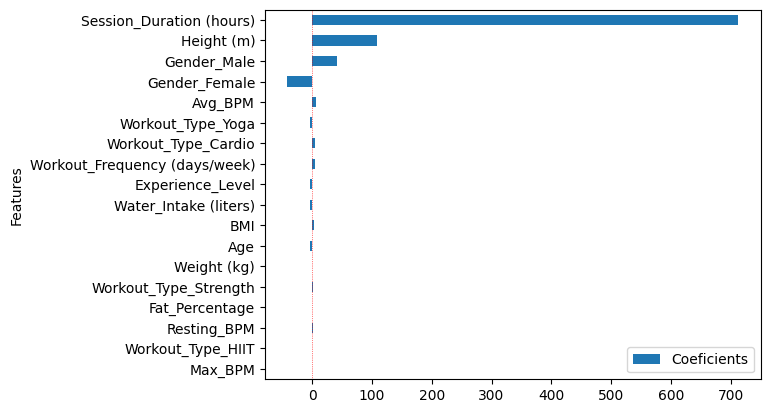

In [42]:
df_coef.sort_values(by="Coeficients_Abs", ascending=True).plot(x="Features", y="Coeficients", kind="barh")

plt.axvline(0, color="red", linewidth=0.5, linestyle=":") #plot de linha vertical (zero)

plt.show()

#6. Métricas

##6.1. Comparativo das métricas

In [90]:
#comparativo de métricas dos fits realizados
pd.concat([
    regression_report(y_test, y_pred),  #fit principal
    regression_report(y, y_pred1),      #fit 1
    regression_report(y_test, y_pred2)  #fit 2
], axis=1).rename(columns={0:"Main_Fit" , 1:"Fit_1", 2:"Fit_2"}) #renomeando as colunas para identificar os fits

,Main_Fit,Fit_1,Fit_2
MAE,30.270140,89.962272,95.034800
MSE,1646.176015,13015.845620,15287.364950
RMSE,40.573095,114.087009,123.642084
MAPE,0.036853,0.100626,0.102657
R2,0.980268,0.824719,0.816753


In [105]:
#retomando os resíduos
residuals.head()

,Calories_Burned
199,15.707098
538,-15.980086
174,-31.023330
464,45.665579
66,82.571839


##6.2. Construção de cada métrica

In [92]:
MAE = (residuals).abs().mean()
MAE

np.float64(30.27013984532087)

In [93]:
MSE = ((residuals)**2).mean()
MSE

np.float64(1646.1760145970536)

In [94]:
RMSE = np.sqrt(((residuals)**2).mean())
RMSE

np.float64(40.57309471308608)

In [99]:
MAPE = (residuals / y_test).abs().mean()
MAPE

np.float64(0.03685299217151945)

In [103]:
R2 = 1 - ((residuals**2).sum() / ((y_test-y_test.mean())**2).sum())
R2

np.float64(0.9802675995368526)